R-squared: 1.0
MSE: 5.825434377016702e-29
Regression Equation:
Brake_power = 10.000 + (0.200 * Injection_timing) + (0.100 * Injector_pressure) + (-0.050 * Temperature) + (0.030 * EGT) + (0.100 * VE) + (-0.010 * CL)


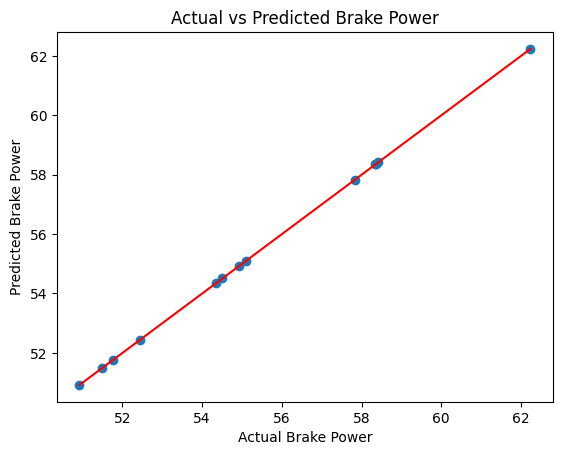

In [1]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

# Input data
data = {
    "Injection_timing": [27, 27, 27, 27, 27, 27, 27, 30, 30, 30, 30, 30, 30],
    "Injector_pressure": [190, 230, 270, 190, 190, 230, 270, 190, 190, 230, 230, 270, 270],
    "Temperature": [29, 30, 30.5, 29.5, 30, 30.5, 31, 31.5, 32, 32, 32.5, 32.5, 33],
    "EGT": [460, 450, 440, 400, 375, 350, 325, 340, 320, 320, 300, 300, 280],
    "VE": [78, 80, 82, 75.5, 76.5, 77.5, 78.5, 79, 79.5, 79.5, 80, 80, 81],
    "CL": [4.5, 4.3, 4.1, 3.4, 3.2, 3, 2.8, 3, 2.8, 2.8, 2.6, 2.6, 2.4],
    "Brake_power": [54.505, 58.357, 62.234, 52.441, 51.768, 55.095, 58.422, 51.495, 50.922, 54.922, 54.349, 58.349, 57.826]
}

df = pd.DataFrame(data)

# Define features and target
X = df[["Injection_timing", "Injector_pressure", "Temperature", "EGT", "VE", "CL"]]
y = df["Brake_power"]

# Create and fit the model
model = LinearRegression()
model.fit(X, y)

# Predict using the model
y_pred = model.predict(X)

# Calculate R-squared and MSE
r2 = r2_score(y, y_pred)
mse = mean_squared_error(y, y_pred)

# Print R-squared and MSE
print(f"R-squared: {r2}")
print(f"MSE: {mse}")

# Print the regression equation
coefficients = model.coef_
intercept = model.intercept_
equation = f"Brake_power = {intercept:.3f} "
for i, col in enumerate(X.columns):
    equation += f"+ ({coefficients[i]:.3f} * {col}) "
print("Regression Equation:")
print(equation.strip())

# Plot the regression results
plt.scatter(y, y_pred)
plt.xlabel("Actual Brake Power")
plt.ylabel("Predicted Brake Power")
plt.title("Actual vs Predicted Brake Power")
plt.plot([min(y), max(y)], [min(y), max(y)], color='red')  # Diagonal line
plt.show()

In [2]:
import pickle
filename = 'brake_power_model.sav'
pickle.dump(model, open(filename, 'wb'))